In [7]:
!pip install tabulate

✅ Libraries imported successfully!
📊 Dataset loaded: 891 rows, 15 columns

First 5 rows:
DATASET INFORMATION
Total Rows: 891
Total Columns: 15
Memory Usage: 0.27 MB

📋 Column Names:
 1. survived
 2. pclass
 3. sex
 4. age
 5. sibsp
 6. parch
 7. fare
 8. embarked
 9. class
10. who
11. adult_male
12. deck
13. embark_town
14. alive
15. alone

📊 Data Types:
str         5
int64       4
float64     2
bool        2
category    1
category    1
Name: count, dtype: int64

MISSING VALUES ANALYSIS


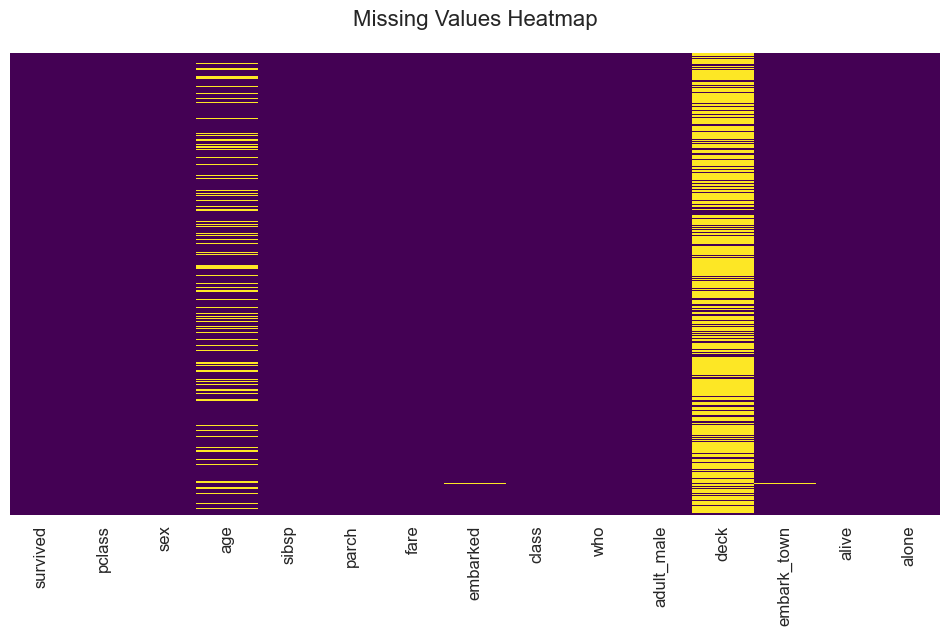


NUMERICAL FEATURES SUMMARY
       survived  pclass     age   sibsp   parch    fare
count    891.00  891.00  714.00  891.00  891.00  891.00
mean       0.38    2.31   29.70    0.52    0.38   32.20
std        0.49    0.84   14.53    1.10    0.81   49.69
min        0.00    1.00    0.42    0.00    0.00    0.00
25%        0.00    2.00   20.12    0.00    0.00    7.91
50%        0.00    3.00   28.00    0.00    0.00   14.45
75%        1.00    3.00   38.00    1.00    0.00   31.00
max        1.00    3.00   80.00    8.00    6.00  512.33

CATEGORICAL FEATURES SUMMARY

SEX:
Unique values: 2
Top 5 values:
sex
male      577
female    314
Name: count, dtype: int64

EMBARKED:
Unique values: 3
Top 5 values:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

CLASS:
Unique values: 3
Top 5 values:
class
Third     491
First     216
Second    184
Name: count, dtype: int64

WHO:
Unique values: 3
Top 5 values:
who
man      537
woman    271
child     83
Name: count, dtype: int64

DECK:
Unique values

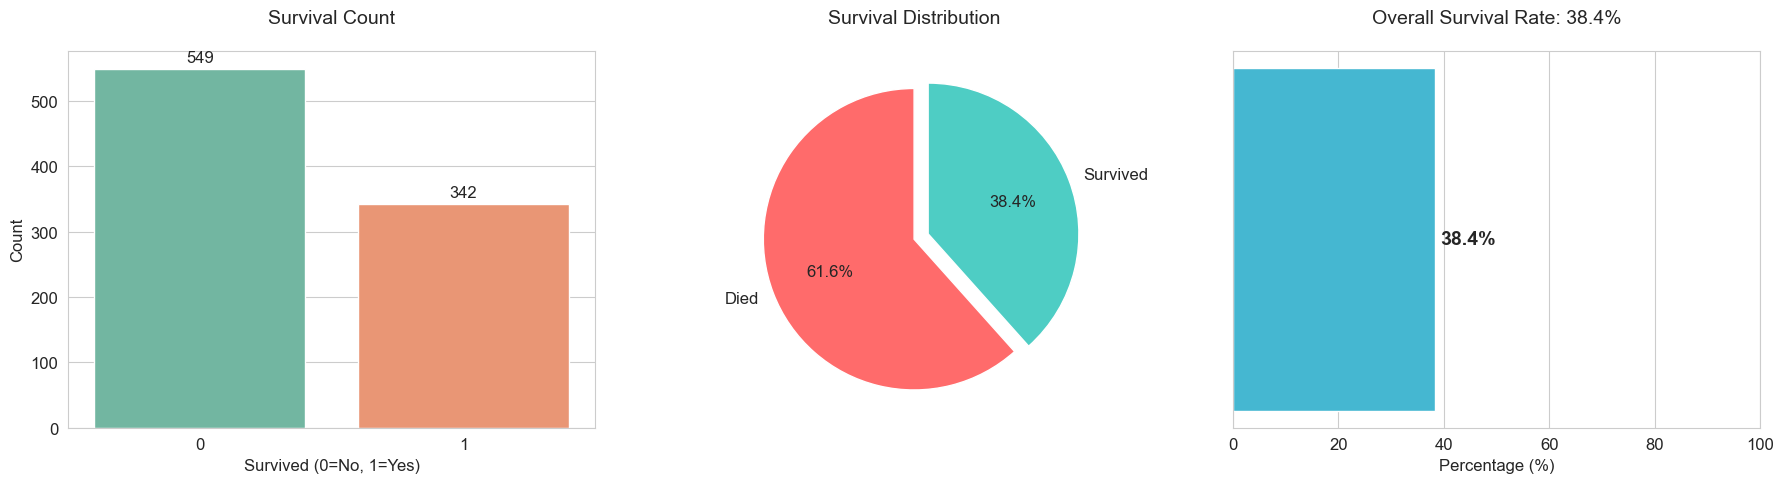

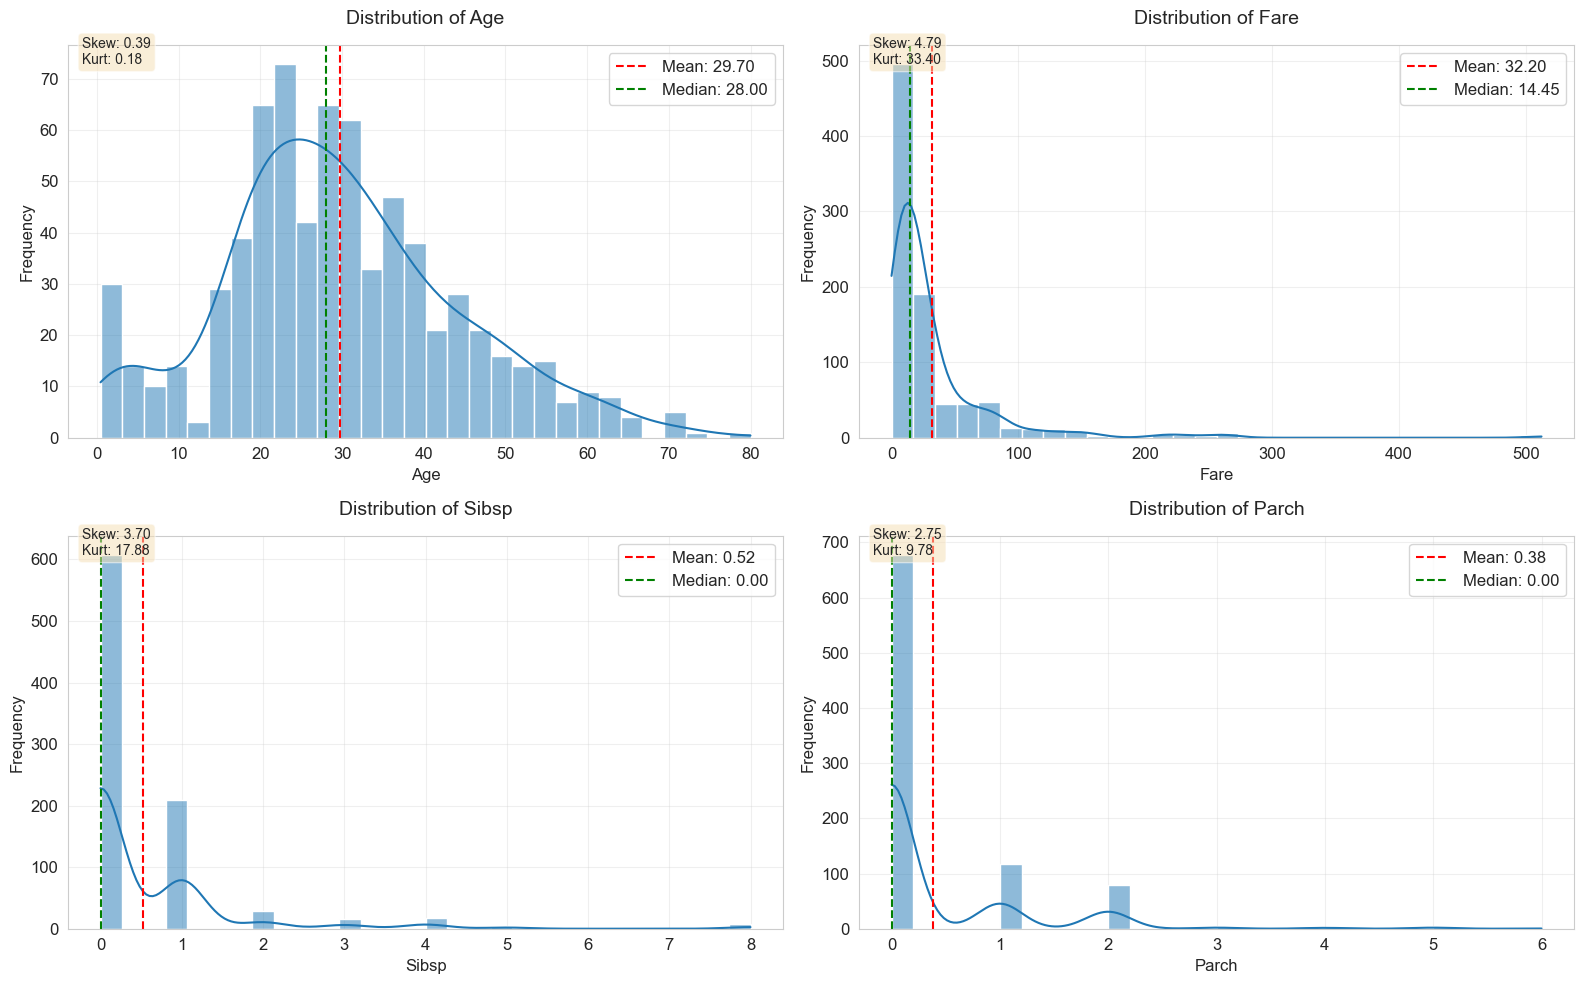

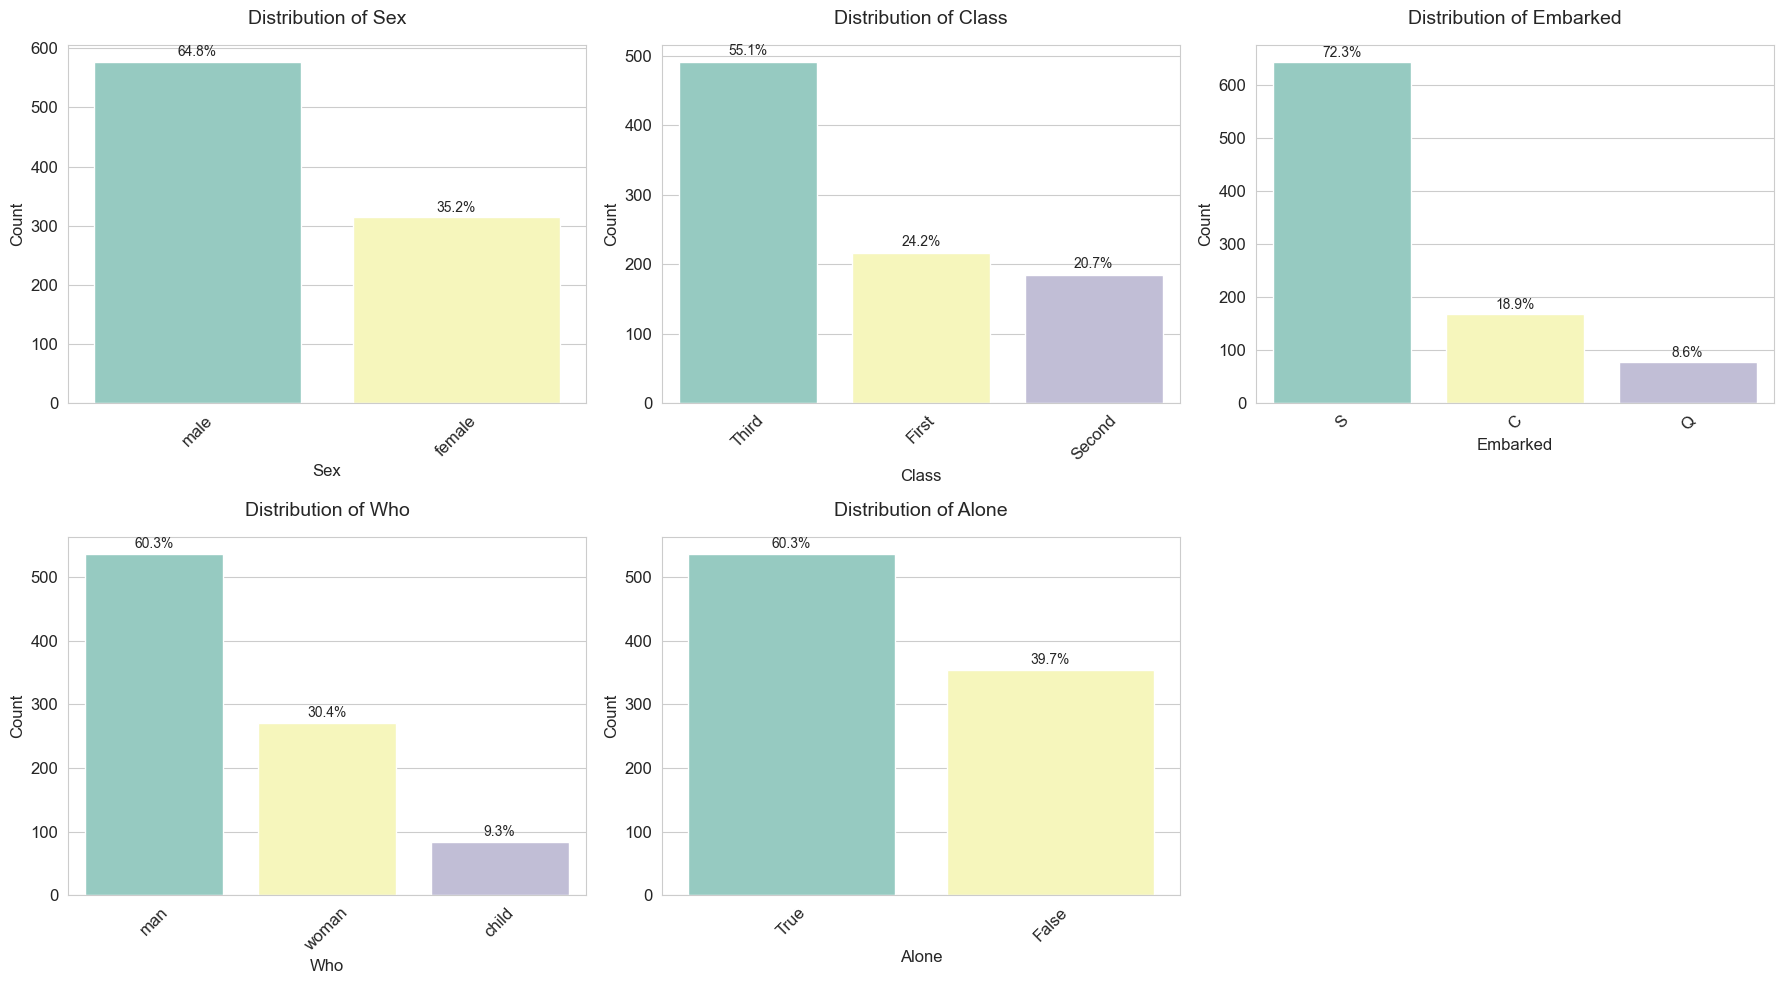

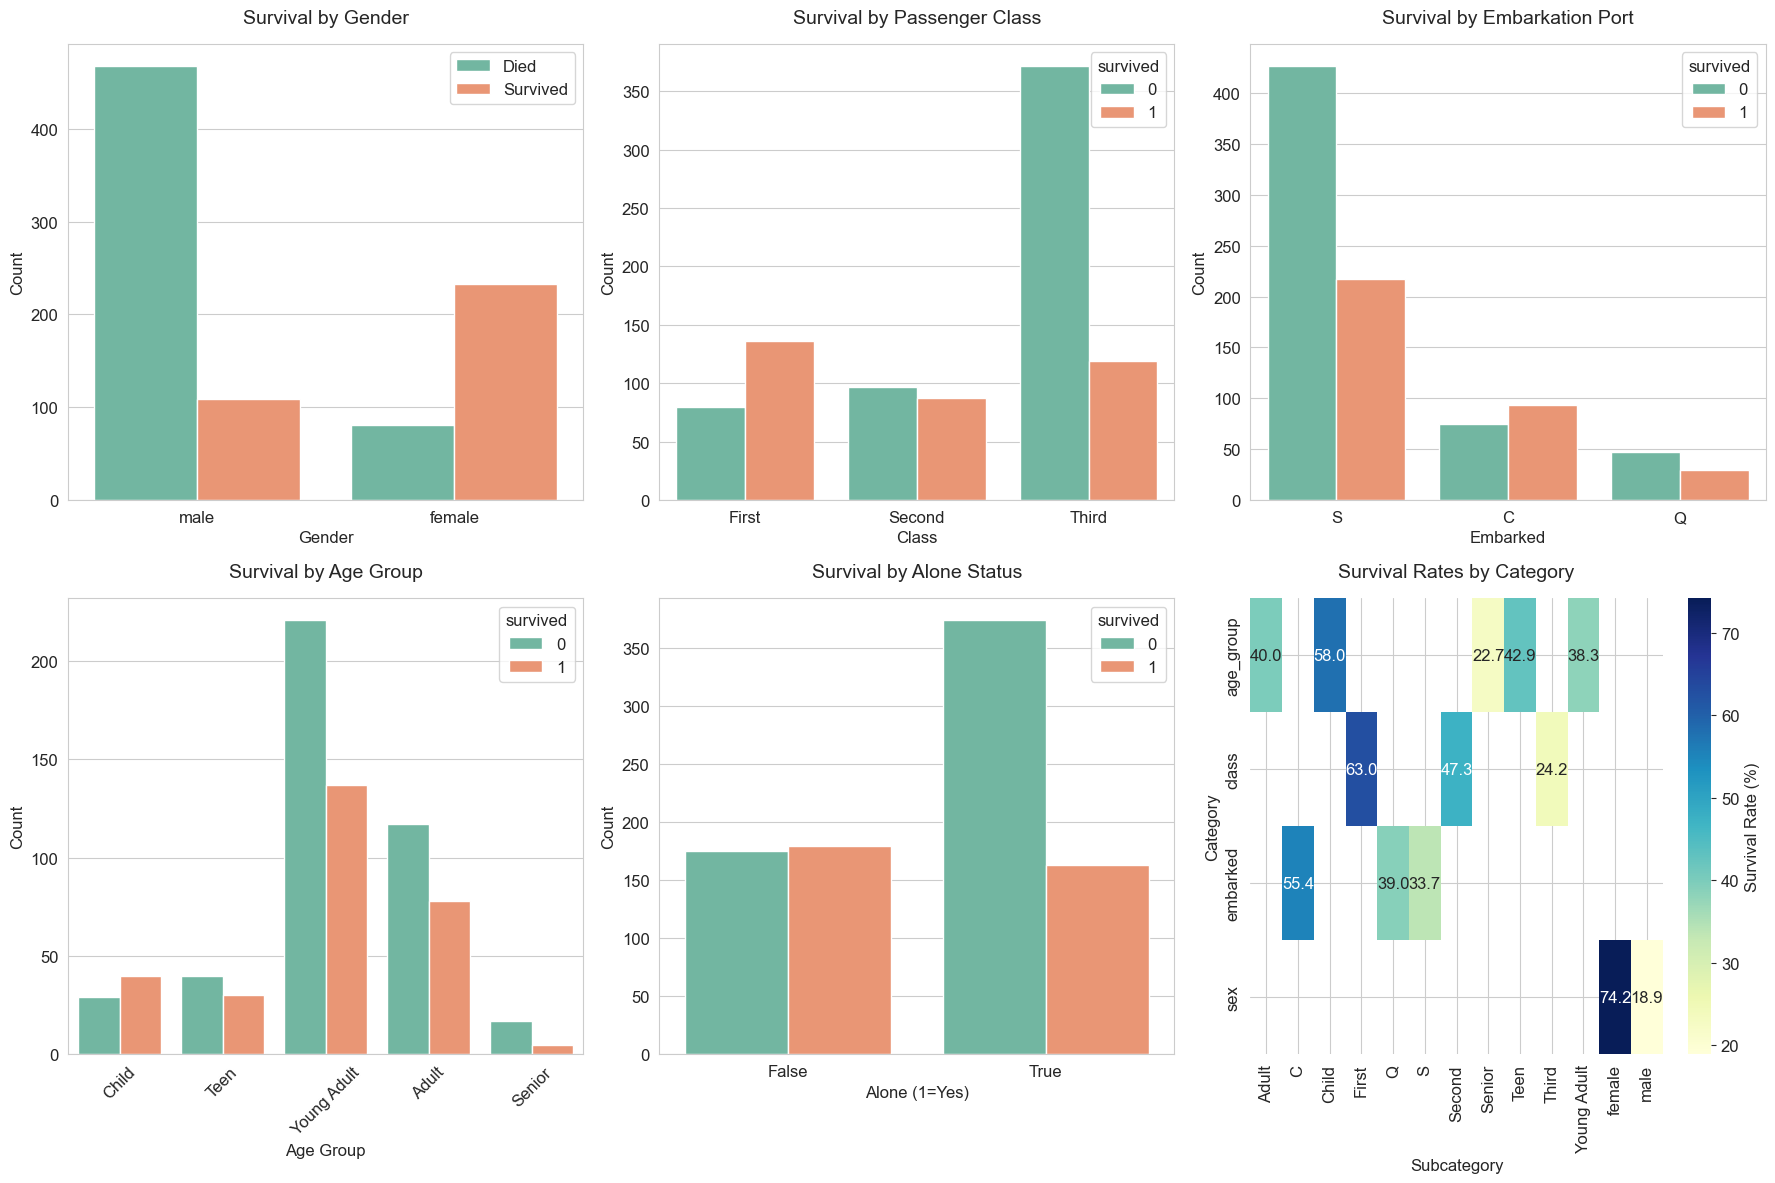

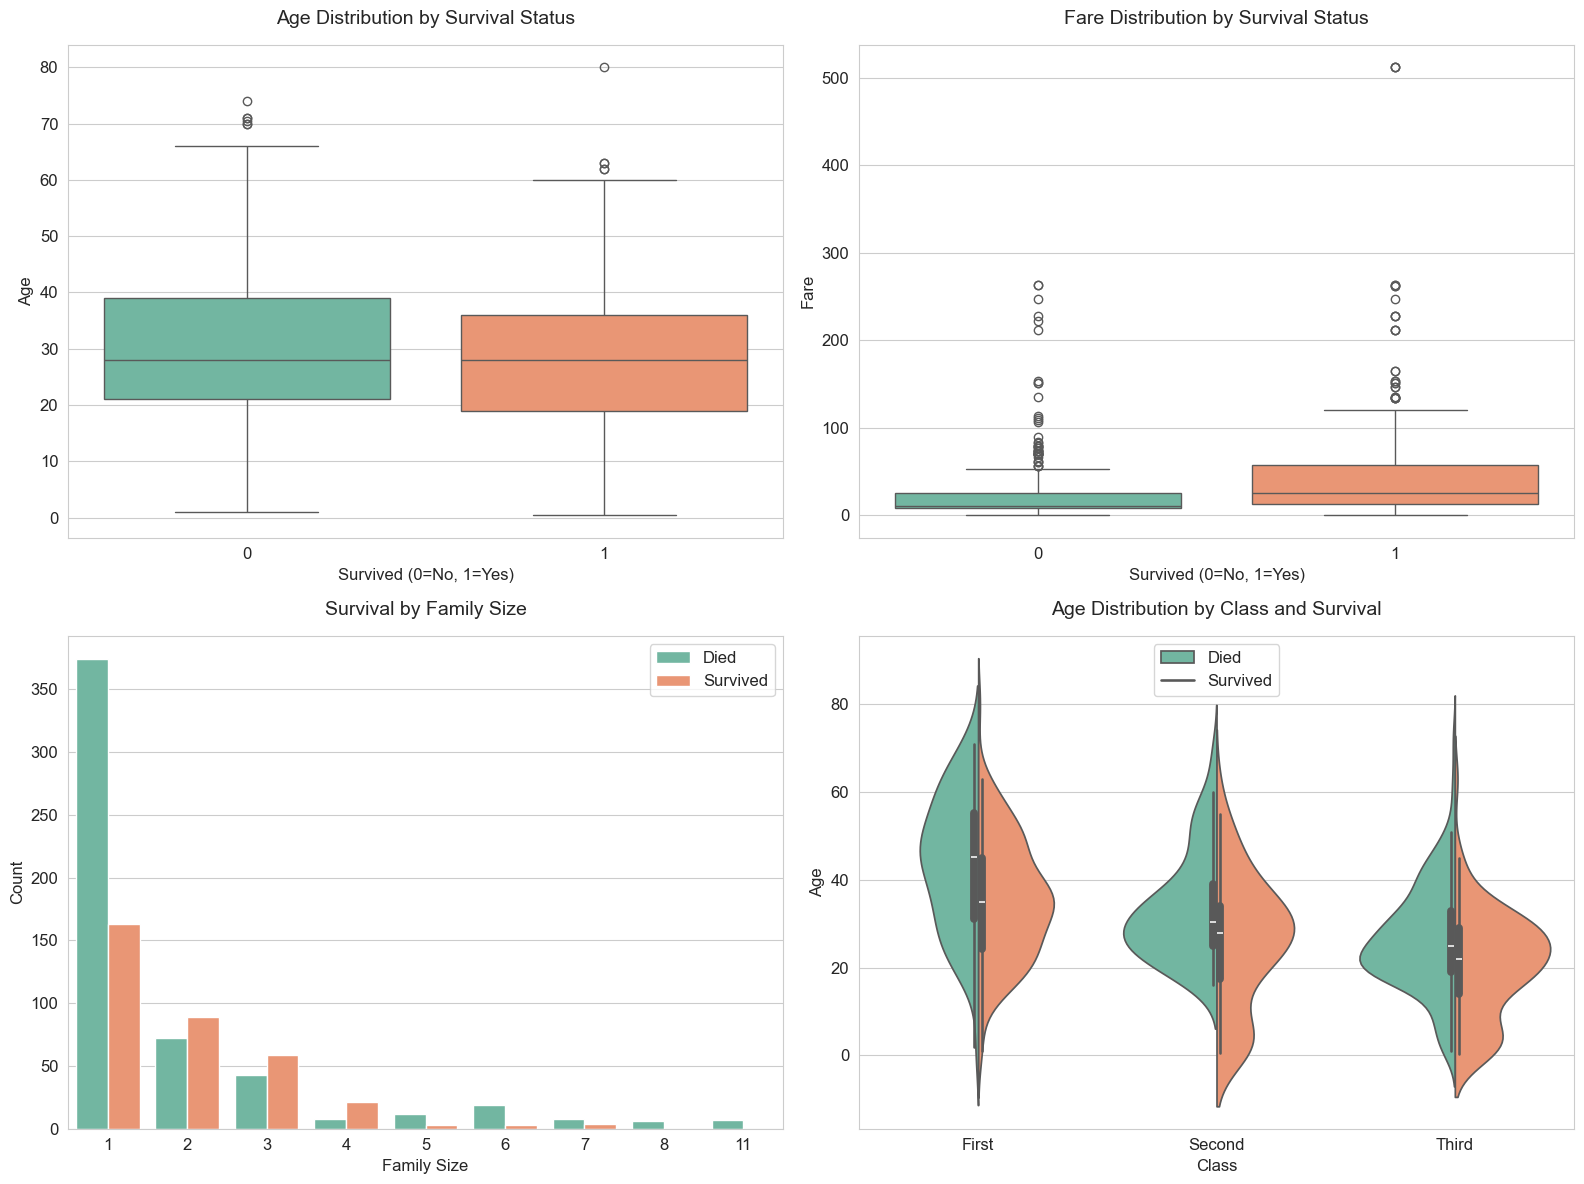

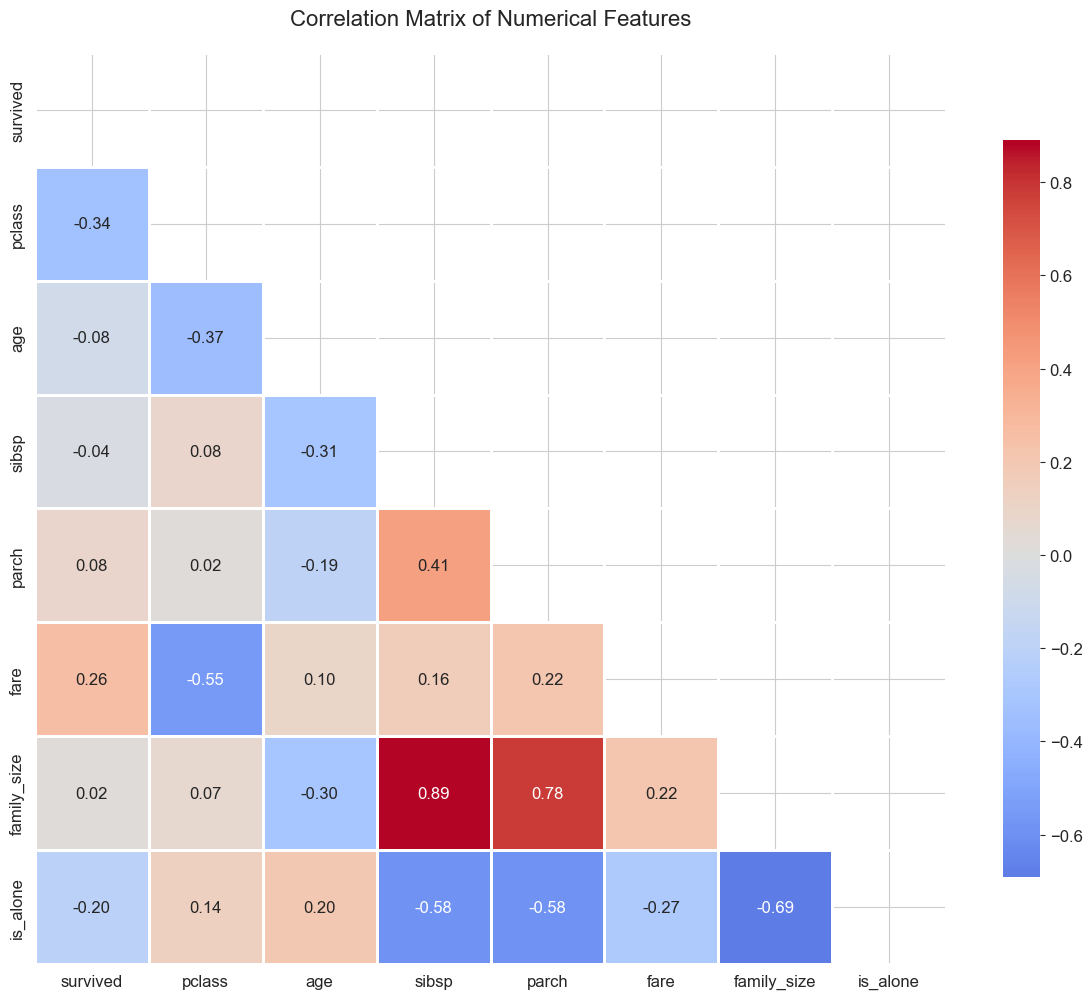

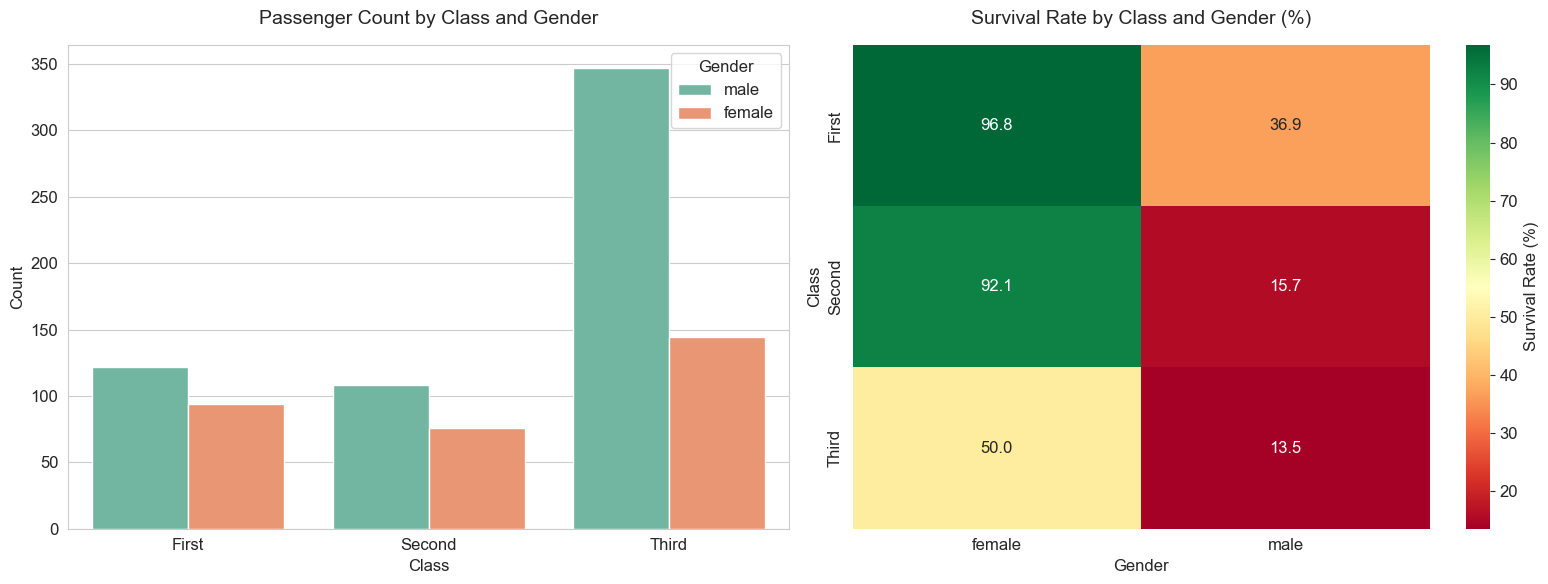

<Figure size 1200x1000 with 0 Axes>

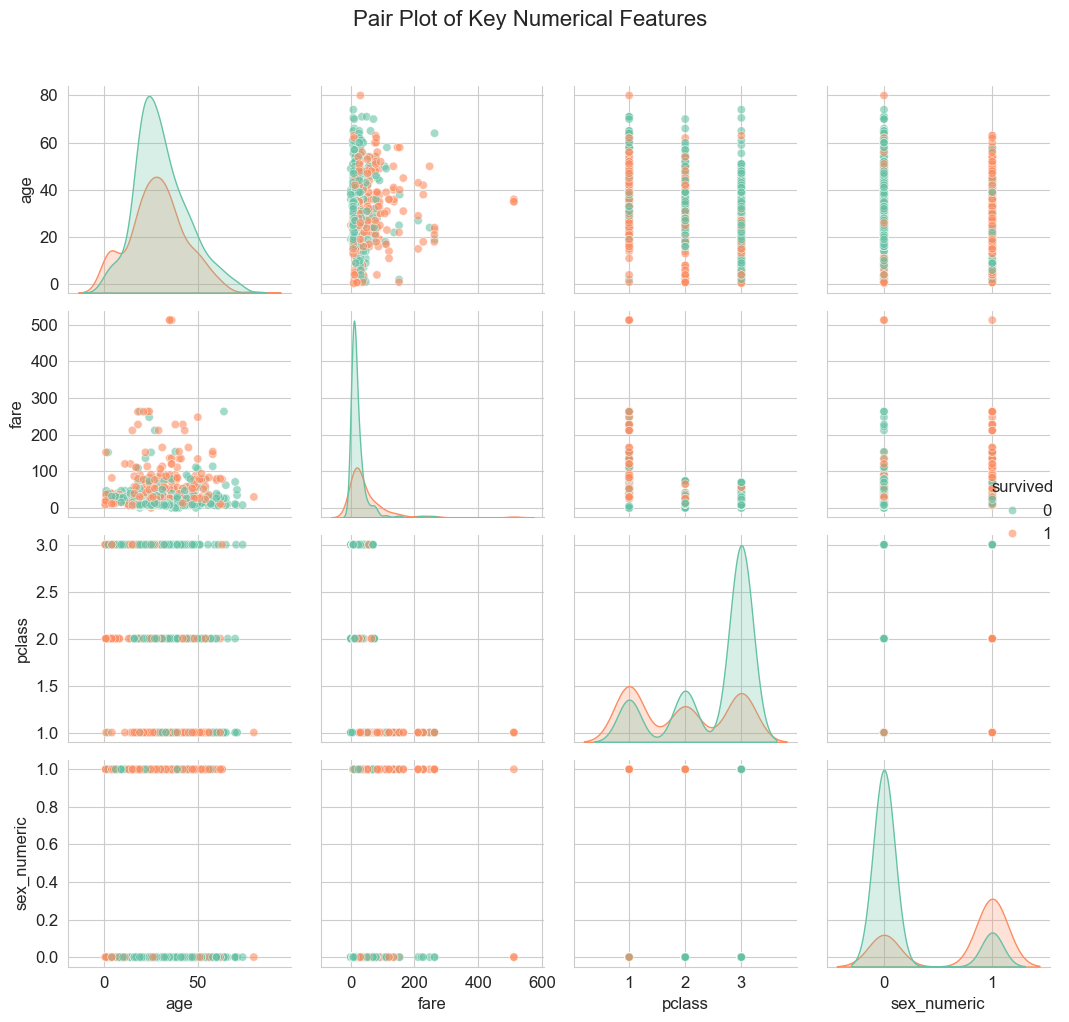

KEY STATISTICAL FINDINGS

📊 Statistics by Survival Status:
            age                 fare               pclass
           mean median    std   mean median    std   mean
survived                                                 
0         30.63   28.0  14.17  22.12   10.5  31.39   2.53
1         28.34   28.0  14.95  48.40   26.0  66.60   1.95

🎯 SURVIVAL RATES BY CATEGORY:
----------------------------------------

SEX:
  female: 74.2% (n=314)
  male: 18.9% (n=577)

CLASS:
  First: 63.0% (n=216)
  Second: 47.3% (n=184)
  Third: 24.2% (n=491)

EMBARKED:
  C: 55.4% (n=168)
  Q: 39.0% (n=77)
  S: 33.7% (n=644)

AGE_GROUP:
  Child: 58.0% (n=69)
  Teen: 42.9% (n=70)
  Young Adult: 38.3% (n=358)
  Adult: 40.0% (n=195)
  Senior: 22.7% (n=22)

ALONE:
  False: 50.6% (n=354)
  True: 30.4% (n=537)

GENERATING MARKDOWN REPORT
✅ Markdown report saved to: reports/TITANIC_EDA_REPORT.md
📊 Total visualizations saved: 15 images in 'images/' folder
💾 Cleaned data saved to: data/titanic_cleaned.csv


In [8]:
# Cell 1: Markdown
# 🚢 Titanic Dataset - Exploratory Data Analysis
# **Author:** Your Name  
# **Date:** [Current Date]
# 
# ## 📋 Project Overview
# Complete EDA of Titanic passenger data to understand survival patterns.

# Cell 2: Code - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
print("✅ Libraries imported successfully!")

# Cell 3: Code - Load Data
df = sns.load_dataset('titanic')
print(f"📊 Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()

# Cell 4: Markdown
# ## 📊 1. Data Understanding

# Cell 5: Code - Basic Information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print("\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print("\n📊 Data Types:")
print(df.dtypes.value_counts())

# Cell 6: Code - Missing Values Analysis
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)
missing_df

# Save visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.savefig('../images/02_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 7: Code - Summary Statistics
print("\n" + "=" * 60)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe().round(2))

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES SUMMARY")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Top 5 values:")
    print(df[col].value_counts().head())

# Cell 8: Markdown
# ## 🧹 2. Data Cleaning

# Cell 9: Code - Data Cleaning
# Create a clean copy
df_clean = df.copy()

print("🔄 Data Cleaning Process:")
print("-" * 40)

# 1. Handle age - fill with median
age_median = df_clean['age'].median()
df_clean['age'].fillna(age_median, inplace=True)
print(f"1. Age: Filled {df['age'].isnull().sum()} missing values with median ({age_median:.1f})")

# 2. Handle embarked - fill with mode
embarked_mode = df_clean['embarked'].mode()[0]
df_clean['embarked'].fillna(embarked_mode, inplace=True)
print(f"2. Embarked: Filled {df['embarked'].isnull().sum()} missing values with mode ('{embarked_mode}')")

# 3. Drop deck column (too many missing values)
df_clean.drop('deck', axis=1, inplace=True, errors='ignore')
print(f"3. Deck: Dropped column (77% missing values)")

# 4. Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], 
                                bins=[0, 12, 18, 35, 60, 100],
                                labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# 5. Create fare groups
df_clean['fare_group'] = pd.qcut(df_clean['fare'], q=4, 
                                  labels=['Low', 'Medium', 'High', 'Very High'])

# 6. Create family size feature
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)

print(f"\n✅ Cleaning Complete!")
print(f"Before: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"After:  {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

# Save cleaned data
df_clean.to_csv('../data/titanic_cleaned.csv', index=False)
print("\n💾 Cleaned data saved to 'data/titanic_cleaned.csv'")

# Cell 10: Markdown
# ## 📈 3. Univariate Analysis

# Cell 11: Code - Target Variable: Survival
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
sns.countplot(data=df_clean, x='survived', ax=axes[0], palette='Set2')
axes[0].set_title('Survival Count', fontsize=14, pad=20)
axes[0].set_xlabel('Survived (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3)

# Pie chart
survival_counts = df_clean['survived'].value_counts()
axes[1].pie(survival_counts.values, labels=['Died', 'Survived'], 
            autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'], 
            explode=[0, 0.1], startangle=90)
axes[1].set_title('Survival Distribution', fontsize=14, pad=20)

# Survival rate
survival_rate = df_clean['survived'].mean() * 100
axes[2].barh([0], [survival_rate], color='#45b7d1', height=0.5)
axes[2].set_xlim(0, 100)
axes[2].set_title(f'Overall Survival Rate: {survival_rate:.1f}%', fontsize=14, pad=20)
axes[2].set_xlabel('Percentage (%)', fontsize=12)
axes[2].text(survival_rate + 1, 0, f'{survival_rate:.1f}%', 
             va='center', fontsize=14, fontweight='bold')
axes[2].set_yticks([])

plt.tight_layout()
plt.savefig('../images/03_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 12: Code - Numerical Features Distribution
numerical_features = ['age', 'fare', 'sibsp', 'parch']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=df_clean, x=feature, ax=axes[idx], kde=True, bins=30)
    axes[idx].axvline(df_clean[feature].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df_clean[feature].mean():.2f}')
    axes[idx].axvline(df_clean[feature].median(), color='green', linestyle='--', 
                      label=f'Median: {df_clean[feature].median():.2f}')
    axes[idx].set_title(f'Distribution of {feature.title()}', fontsize=14, pad=15)
    axes[idx].set_xlabel(feature.title(), fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Add skewness and kurtosis
    skewness = df_clean[feature].skew()
    kurtosis = df_clean[feature].kurtosis()
    axes[idx].text(0.02, 0.95, f'Skew: {skewness:.2f}\nKurt: {kurtosis:.2f}', 
                   transform=axes[idx].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../images/04_age_distribution.png', dpi=300, bbox_inches='tight')  # Save age specifically
plt.savefig('../images/05_fare_distribution.png', dpi=300, bbox_inches='tight') # Save fare specifically
plt.show()

# Cell 13: Code - Categorical Features Distribution
categorical_features = ['sex', 'class', 'embarked', 'who', 'alone']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features[:5]):
    # Count plot
    order = df_clean[feature].value_counts().index
    ax = sns.countplot(data=df_clean, x=feature, ax=axes[idx], 
                       palette='Set3', order=order)
    axes[idx].set_title(f'Distribution of {feature.title()}', fontsize=14, pad=15)
    axes[idx].set_xlabel(feature.title(), fontsize=12)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    total = len(df_clean[feature])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 10,
                f'{height/total:.1%}', ha='center', fontsize=10)

axes[5].axis('off')  # Hide empty subplot

plt.tight_layout()
plt.savefig('../images/06_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/07_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 14: Markdown
# ## 🔗 4. Bivariate Analysis

# Cell 15: Code - Survival by Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Gender
sns.countplot(data=df_clean, x='sex', hue='survived', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Survival by Gender', fontsize=14, pad=15)
axes[0,0].set_xlabel('Gender', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
axes[0,0].legend(['Died', 'Survived'])

# 2. Passenger Class
sns.countplot(data=df_clean, x='class', hue='survived', ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Survival by Passenger Class', fontsize=14, pad=15)
axes[0,1].set_xlabel('Class', fontsize=12)
axes[0,1].set_ylabel('Count', fontsize=12)

# 3. Embarkation Port
sns.countplot(data=df_clean, x='embarked', hue='survived', ax=axes[0,2], palette='Set2')
axes[0,2].set_title('Survival by Embarkation Port', fontsize=14, pad=15)
axes[0,2].set_xlabel('Embarked', fontsize=12)
axes[0,2].set_ylabel('Count', fontsize=12)

# 4. Age Group
sns.countplot(data=df_clean, x='age_group', hue='survived', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Survival by Age Group', fontsize=14, pad=15)
axes[1,0].set_xlabel('Age Group', fontsize=12)
axes[1,0].set_ylabel('Count', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Alone Status
sns.countplot(data=df_clean, x='alone', hue='survived', ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Survival by Alone Status', fontsize=14, pad=15)
axes[1,1].set_xlabel('Alone (1=Yes)', fontsize=12)
axes[1,1].set_ylabel('Count', fontsize=12)

# 6. Survival Rate by Category (Heatmap style)
survival_rates = []
categories = ['sex', 'class', 'embarked', 'age_group']
for cat in categories:
    rates = df_clean.groupby(cat)['survived'].mean() * 100
    for idx, rate in rates.items():
        survival_rates.append({'Category': cat, 'Subcategory': idx, 'Survival Rate': rate})

rates_df = pd.DataFrame(survival_rates)
pivot_table = rates_df.pivot(index='Category', columns='Subcategory', values='Survival Rate')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1,2], 
            cbar_kws={'label': 'Survival Rate (%)'})
axes[1,2].set_title('Survival Rates by Category', fontsize=14, pad=15)

plt.tight_layout()
plt.savefig('../images/08_survival_by_gender.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/09_survival_by_class.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/10_survival_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 16: Code - Survival by Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Age vs Survival
sns.boxplot(data=df_clean, x='survived', y='age', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Age Distribution by Survival Status', fontsize=14, pad=15)
axes[0,0].set_xlabel('Survived (0=No, 1=Yes)', fontsize=12)
axes[0,0].set_ylabel('Age', fontsize=12)

# 2. Fare vs Survival
sns.boxplot(data=df_clean, x='survived', y='fare', ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Fare Distribution by Survival Status', fontsize=14, pad=15)
axes[0,1].set_xlabel('Survived (0=No, 1=Yes)', fontsize=12)
axes[0,1].set_ylabel('Fare', fontsize=12)

# 3. Family Size vs Survival
sns.countplot(data=df_clean, x='family_size', hue='survived', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Survival by Family Size', fontsize=14, pad=15)
axes[1,0].set_xlabel('Family Size', fontsize=12)
axes[1,0].set_ylabel('Count', fontsize=12)
axes[1,0].legend(['Died', 'Survived'])

# 4. Violin Plot: Age distribution by class and survival
sns.violinplot(data=df_clean, x='class', y='age', hue='survived', 
               split=True, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Age Distribution by Class and Survival', fontsize=14, pad=15)
axes[1,1].set_xlabel('Class', fontsize=12)
axes[1,1].set_ylabel('Age', fontsize=12)
axes[1,1].legend(['Died', 'Survived'])

plt.tight_layout()
plt.savefig('../images/11_age_vs_survival.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/12_fare_vs_survival.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 17: Markdown
# ## 🔄 5. Multivariate Analysis

# Cell 18: Code - Correlation Analysis
# Select numerical columns
numerical_df = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
corr_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('../images/13_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 19: Code - Class × Gender × Survival
# Create pivot table
pivot_data = df_clean.pivot_table(index='class', columns=['sex', 'survived'], 
                                  values='age', aggfunc='count', fill_value=0)

# Calculate percentages
pivot_percent = df_clean.pivot_table(index='class', columns='sex', 
                                     values='survived', aggfunc='mean') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(data=df_clean, x='class', hue='sex', ax=axes[0], palette='Set2')
axes[0].set_title('Passenger Count by Class and Gender', fontsize=14, pad=15)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Gender')

# Heatmap of survival rates
sns.heatmap(pivot_percent, annot=True, fmt='.1f', cmap='RdYlGn', 
            ax=axes[1], cbar_kws={'label': 'Survival Rate (%)'})
axes[1].set_title('Survival Rate by Class and Gender (%)', fontsize=14, pad=15)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Class', fontsize=12)

plt.tight_layout()
plt.savefig('../images/14_class_gender_survival.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 20: Code - Pairplot of Key Features
key_features = ['survived', 'age', 'fare', 'pclass', 'sex', 'embarked']
pairplot_df = df_clean[key_features]

# Convert categorical to numeric for pairplot
pairplot_df['sex_numeric'] = pairplot_df['sex'].map({'male': 0, 'female': 1})
pairplot_df['embarked_numeric'] = pairplot_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

plt.figure(figsize=(12, 10))
sns.pairplot(pairplot_df[['survived', 'age', 'fare', 'pclass', 'sex_numeric']], 
             hue='survived', palette='Set2', plot_kws={'alpha': 0.6}, 
             diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('../images/15_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 21: Markdown
# ## 📊 6. Statistical Insights & Key Findings

# Cell 22: Code - Calculate Key Statistics
print("=" * 60)
print("KEY STATISTICAL FINDINGS")
print("=" * 60)

# Survival statistics
survival_stats = df_clean.groupby('survived').agg({
    'age': ['mean', 'median', 'std'],
    'fare': ['mean', 'median', 'std'],
    'pclass': ['mean']
}).round(2)

print("\n📊 Statistics by Survival Status:")
print(survival_stats)

# Calculate survival rates
print("\n🎯 SURVIVAL RATES BY CATEGORY:")
print("-" * 40)

categories = ['sex', 'class', 'embarked', 'age_group', 'alone']
for category in categories:
    print(f"\n{category.upper()}:")
    rates = df_clean.groupby(category)['survived'].mean() * 100
    for value, rate in rates.items():
        count = len(df_clean[df_clean[category] == value])
        print(f"  {value}: {rate:.1f}% (n={count})")

# Cell 23: Code - Generate Markdown Report
print("\n" + "=" * 60)
print("GENERATING MARKDOWN REPORT")
print("=" * 60)

# Calculate all insights
total_passengers = len(df_clean)
survival_rate = df_clean['survived'].mean() * 100
female_survival = df_clean[df_clean['sex'] == 'female']['survived'].mean() * 100
male_survival = df_clean[df_clean['sex'] == 'male']['survived'].mean() * 100
first_class_survival = df_clean[df_clean['class'] == 'First']['survived'].mean() * 100
third_class_survival = df_clean[df_clean['class'] == 'Third']['survived'].mean() * 100
child_survival = df_clean[df_clean['age'] <= 12]['survived'].mean() * 100
avg_age = df_clean['age'].mean()
avg_fare = df_clean['fare'].mean()

# Get describe table as markdown
describe_table = df_clean.describe().round(2).to_markdown()

# Start creating markdown report
md_report_parts = []

# Header
md_report_parts.append(f"""# 🚢 Titanic Dataset - Exploratory Data Analysis Report

**Generated on:** {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}  
**Author:** Titanic EDA Project  
**Dataset:** Titanic Passenger List (1912)

## 📋 Executive Summary

| Metric | Value |
|--------|-------|
| Total Passengers | {total_passengers:,} |
| Overall Survival Rate | {survival_rate:.1f}% |
| Female Survival Rate | {female_survival:.1f}% |
| Male Survival Rate | {male_survival:.1f}% |
| 1st Class Survival Rate | {first_class_survival:.1f}% |
| 3rd Class Survival Rate | {third_class_survival:.1f}% |
| Average Age | {avg_age:.1f} years |
| Average Fare | ${avg_fare:.2f} |

## 📊 1. Dataset Overview

**Original Dataset:**
- Rows: {df.shape[0]:,}
- Columns: {df.shape[1]}
- Memory Usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB

**Cleaned Dataset:**
- Rows: {df_clean.shape[0]:,}
- Columns: {df_clean.shape[1]}
- Missing Values Remaining: {df_clean.isnull().sum().sum()}

## 🧹 2. Data Cleaning Process

1. **Age**: Filled {df['age'].isnull().sum()} missing values with median ({df_clean['age'].median():.1f})
2. **Embarked**: Filled {df['embarked'].isnull().sum()} missing values with mode ('{df_clean['embarked'].mode()[0]}')
3. **Deck**: Dropped column (77.1% missing values)
4. **New Features Created**:
   - Age Groups (Child, Teen, Young Adult, Adult, Senior)
   - Fare Groups (Low, Medium, High, Very High)
   - Family Size
   - Alone Status

## 📈 3. Key Visualizations

### 3.1 Survival Distribution
![Survival Distribution](../images/03_survival_distribution.png)

### 3.2 Age Distribution
![Age Distribution](../images/04_age_distribution.png)

### 3.3 Fare Distribution
![Fare Distribution](../images/05_fare_distribution.png)

### 3.4 Survival by Gender
![Survival by Gender](../images/08_survival_by_gender.png)

### 3.5 Survival by Passenger Class
![Survival by Class](../images/09_survival_by_class.png)

### 3.6 Correlation Analysis
![Correlation Heatmap](../images/13_correlation_heatmap.png)

## 🔍 4. Key Insights

### 4.1 Survival Patterns

**Gender Disparity:**
- Females were {female_survival/male_survival:.1f}x more likely to survive than males
- Female survival rate: {female_survival:.1f}%
- Male survival rate: {male_survival:.1f}%

**Class Inequality:**
- 1st class passengers were {first_class_survival/third_class_survival:.1f}x more likely to survive than 3rd class
- Survival rates by class:
  - 1st Class: {first_class_survival:.1f}%
  - 2nd Class: {df_clean[df_clean['class'] == 'Second']['survived'].mean()*100:.1f}%
  - 3rd Class: {third_class_survival:.1f}%

**Age Impact:**
- Children (≤12 years): {child_survival:.1f}% survival rate
- Average age of survivors: {df_clean[df_clean['survived'] == 1]['age'].mean():.1f} years
- Average age of non-survivors: {df_clean[df_clean['survived'] == 0]['age'].mean():.1f} years

### 4.2 Economic Factors
- Average fare paid by survivors: ${df_clean[df_clean['survived'] == 1]['fare'].mean():.2f}
- Average fare paid by non-survivors: ${df_clean[df_clean['survived'] == 0]['fare'].mean():.2f}
- Correlation between fare and survival: {df_clean['fare'].corr(df_clean['survived']):.3f}

### 4.3 Family & Travel Companions
- Traveling alone: {df_clean[df_clean['alone'] == 1]['survived'].mean()*100:.1f}% survival rate
- With family: {df_clean[df_clean['alone'] == 0]['survived'].mean()*100:.1f}% survival rate
- Optimal family size for survival: {df_clean.groupby('family_size')['survived'].mean().idxmax()} members

### 4.4 Embarkation Port Analysis
- Cherbourg (C): {df_clean[df_clean['embarked'] == 'C']['survived'].mean()*100:.1f}% survival
- Queenstown (Q): {df_clean[df_clean['embarked'] == 'Q']['survived'].mean()*100:.1f}% survival
- Southampton (S): {df_clean[df_clean['embarked'] == 'S']['survived'].mean()*100:.1f}% survival
""")

# Statistical Summary
md_report_parts.append("## 📋 5. Statistical Summary\n\n")
md_report_parts.append("### 5.1 Numerical Features Summary\n")
md_report_parts.append("```python\n")
md_report_parts.append(describe_table + "\n")
md_report_parts.append("```\n\n")
md_report_parts.append("### 5.2 Survival Rates by Category\n")
md_report_parts.append("| Category | Subcategory | Survival Rate | Count |\n")
md_report_parts.append("|----------|-------------|---------------|-------|\n")

# Add survival rates table
for category in ['sex', 'class', 'embarked', 'age_group']:
    rates = df_clean.groupby(category)['survived'].mean() * 100
    counts = df_clean[category].value_counts()
    for value in rates.index:
        md_report_parts.append(f"| {category.title()} | {value} | {rates[value]:.1f}% | {counts[value]:,} |\n")

# Continue with the rest of the report
md_report_parts.append("""
## 💡 6. Conclusions & Recommendations

### 6.1 Key Conclusions
1. **Gender was the strongest predictor** of survival, with women having significantly higher survival rates
2. **Socioeconomic status** (as indicated by passenger class) played a crucial role in survival chances
3. **Age was a factor**, with children having better survival rates than adults
4. **Traveling with family** slightly increased survival chances compared to traveling alone
5. **Fare price correlated with survival**, indicating economic inequality in safety measures

### 6.2 Recommendations for Historical Analysis
1. **Prioritize vulnerable groups** - The "women and children first" policy was evident in the data
2. **Address class inequality** - Ensure equal access to safety equipment for all passenger classes
3. **Family coordination** - Develop family-based evacuation protocols
4. **Economic transparency** - Ensure safety measures aren't tied to ticket price

### 6.3 Modern Implications
- Importance of equitable safety protocols in transportation
- Need for clear evacuation procedures that don't discriminate by demographics
- Value of historical data analysis for improving modern safety standards

## 📁 7. Project Structure
titanic_eda_project/
├── data/ # Data files
├── notebooks/ # Jupyter notebook
├── reports/ # This report
├── images/ # Generated visualizations
├── src/ # Python scripts
└── README.md # Project documentation

## 🔗 8. References
1. Titanic dataset from Seaborn library
2. Historical records of RMS Titanic
3. Python Data Science Stack: Pandas, NumPy, Matplotlib, Seaborn

---
*Report generated automatically by Titanic EDA Analysis System*
""")

# Combine all parts
md_report = "".join(md_report_parts)

# Save the markdown report
os.makedirs('../reports', exist_ok=True)
with open('../reports/TITANIC_EDA_REPORT.md', 'w', encoding='utf-8') as f:
    f.write(md_report)

print(f"✅ Markdown report saved to: reports/TITANIC_EDA_REPORT.md")
print(f"📊 Total visualizations saved: 15 images in 'images/' folder")
print(f"💾 Cleaned data saved to: data/titanic_cleaned.csv")